In [1]:
# Rahul Muddhapuram
#ASU ID: 1234423179
# CSE 578: Data Visualization
# Final Project Python Code

# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import parallel_coordinates
from statsmodels.graphics.mosaicplot import mosaic
import squarify

# --- Load Data ---
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

data = pd.read_csv('adult.data.txt', header=None, names=column_names, na_values=' ?', skipinitialspace=True)

# --- Clean Data ---
data.dropna(inplace=True)
for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    data[col] = data[col].str.strip()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


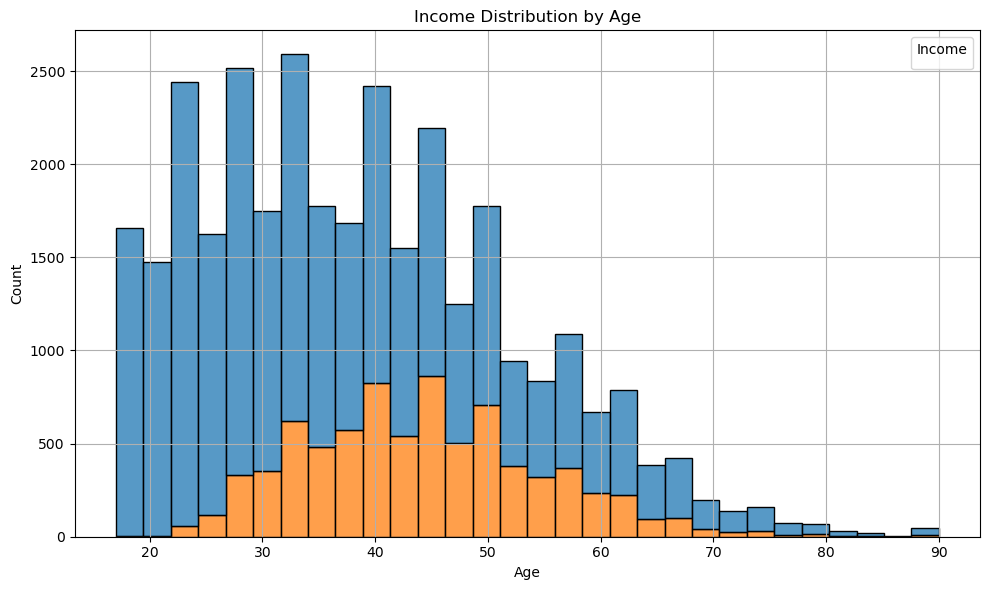

In [2]:
# --- Visualization 1: Income Distribution by Age ---
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='age', hue='income', multiple='stack', bins=30)
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Income')
plt.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


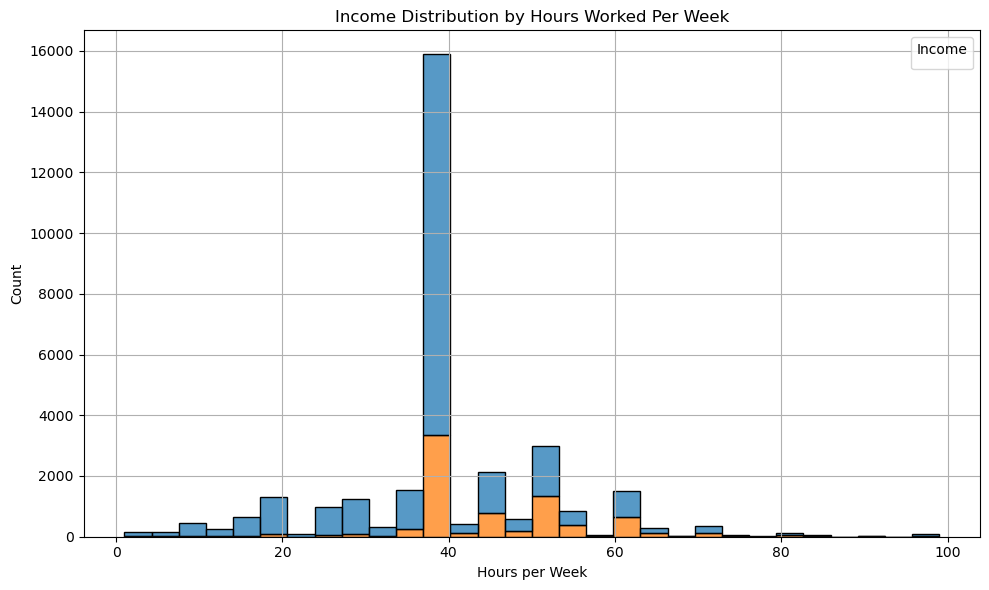

In [3]:
# --- Visualization 2: Income Distribution by Hours Worked ---
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='hours-per-week', hue='income', multiple='stack', bins=30)
plt.title('Income Distribution by Hours Worked Per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.legend(title='Income')
plt.grid(True)
plt.tight_layout()
plt.show()

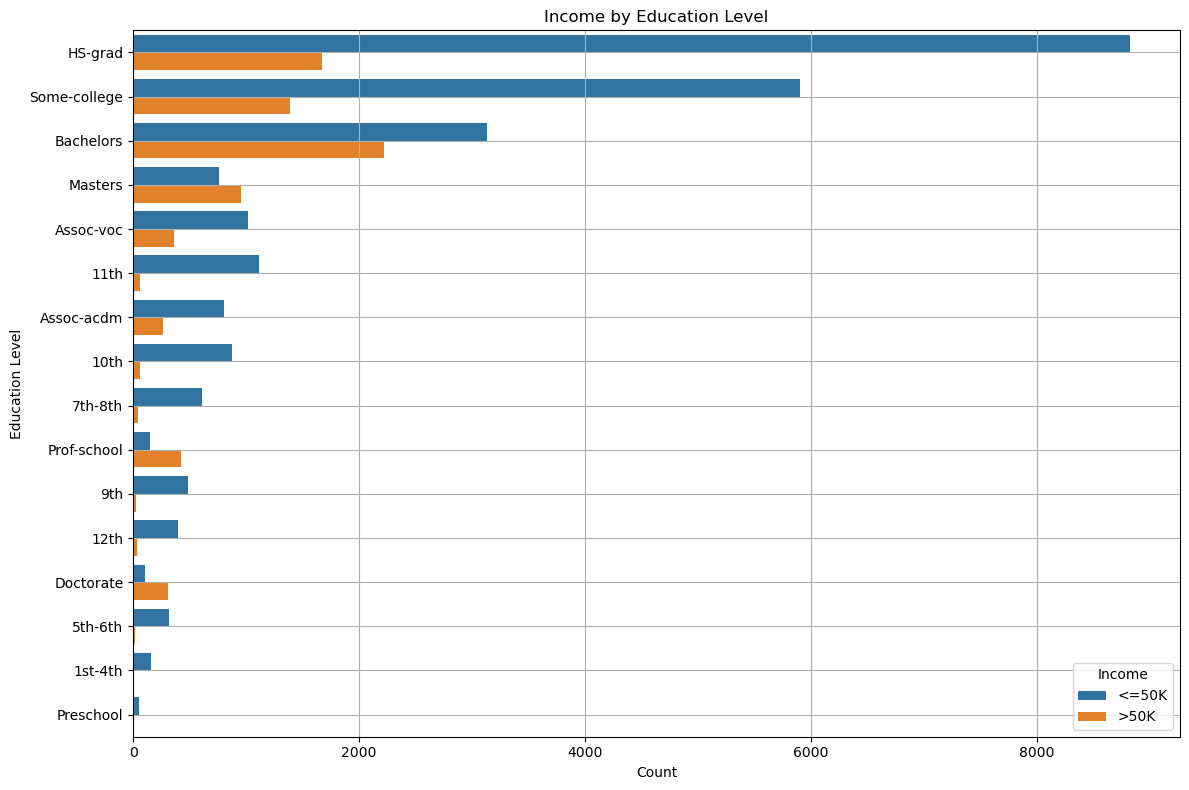

In [4]:
# --- Visualization 3: Education Level vs Income ---
plt.figure(figsize=(12,8))
sns.countplot(data=data, y='education', hue='income', order=data['education'].value_counts().index)
plt.title('Income by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Income')
plt.grid(True)
plt.tight_layout()
plt.show()

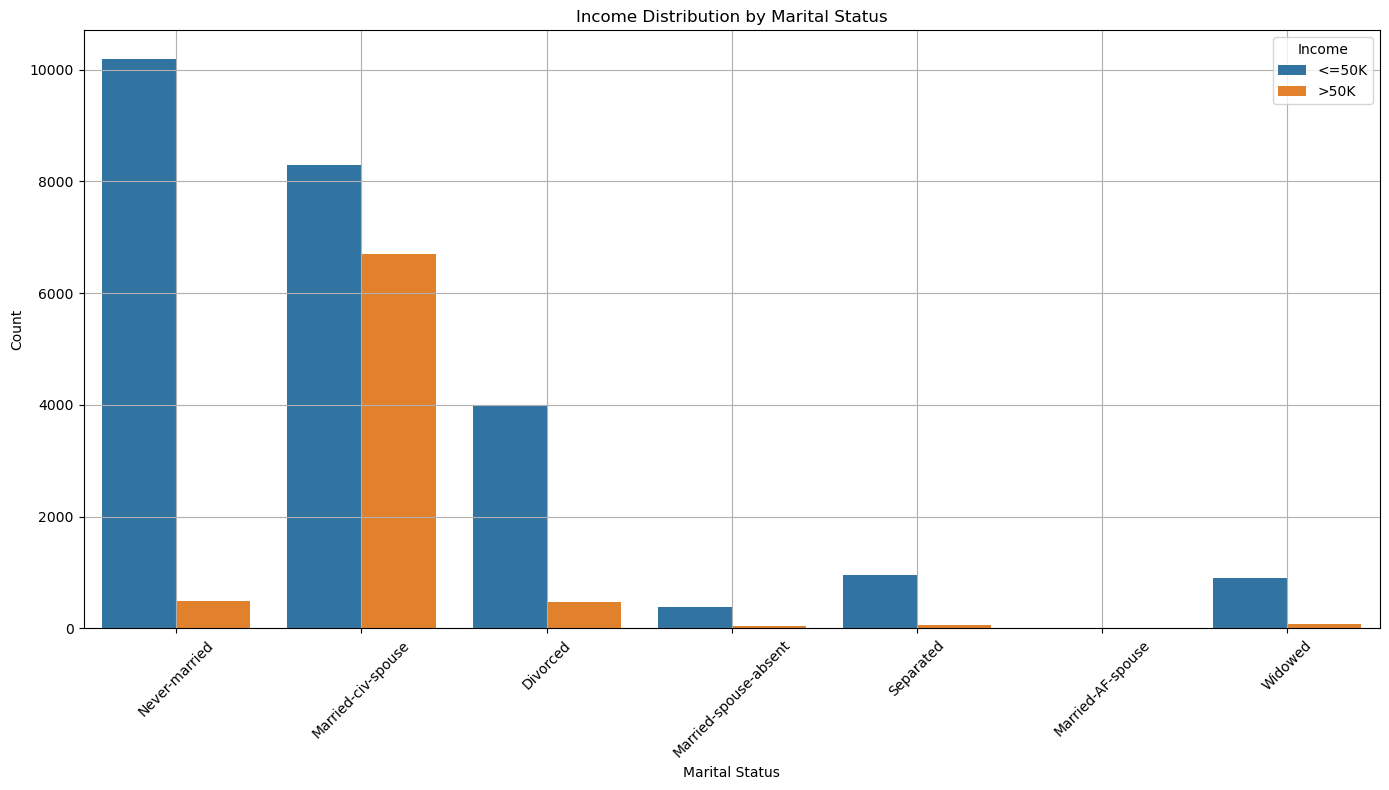

In [5]:
# --- Visualization 4: Marital Status vs Income ---
plt.figure(figsize=(14,8))
sns.countplot(data=data, x='marital-status', hue='income')
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

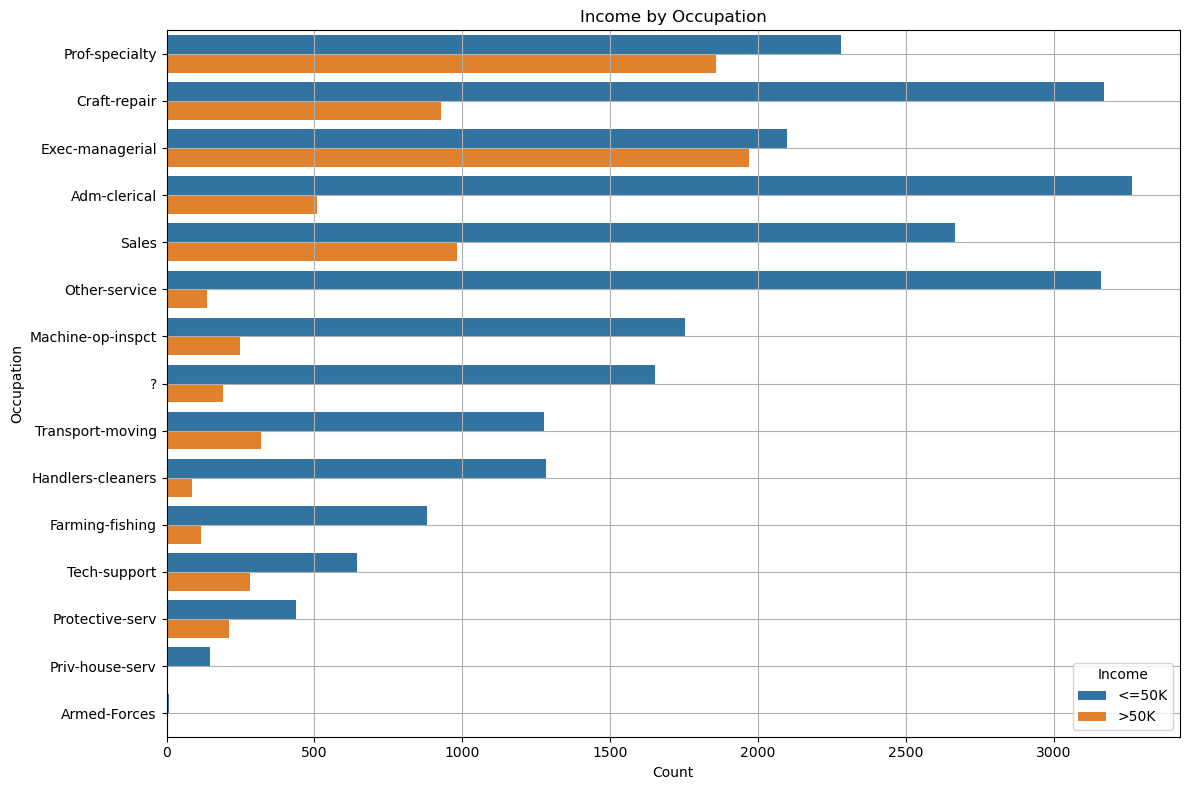

In [6]:
# --- Visualization 5: Occupation vs Income ---
plt.figure(figsize=(12,8))
sns.countplot(data=data, y='occupation', hue='income', order=data['occupation'].value_counts().index)
plt.title('Income by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Income')
plt.grid(True)
plt.tight_layout()
plt.show()

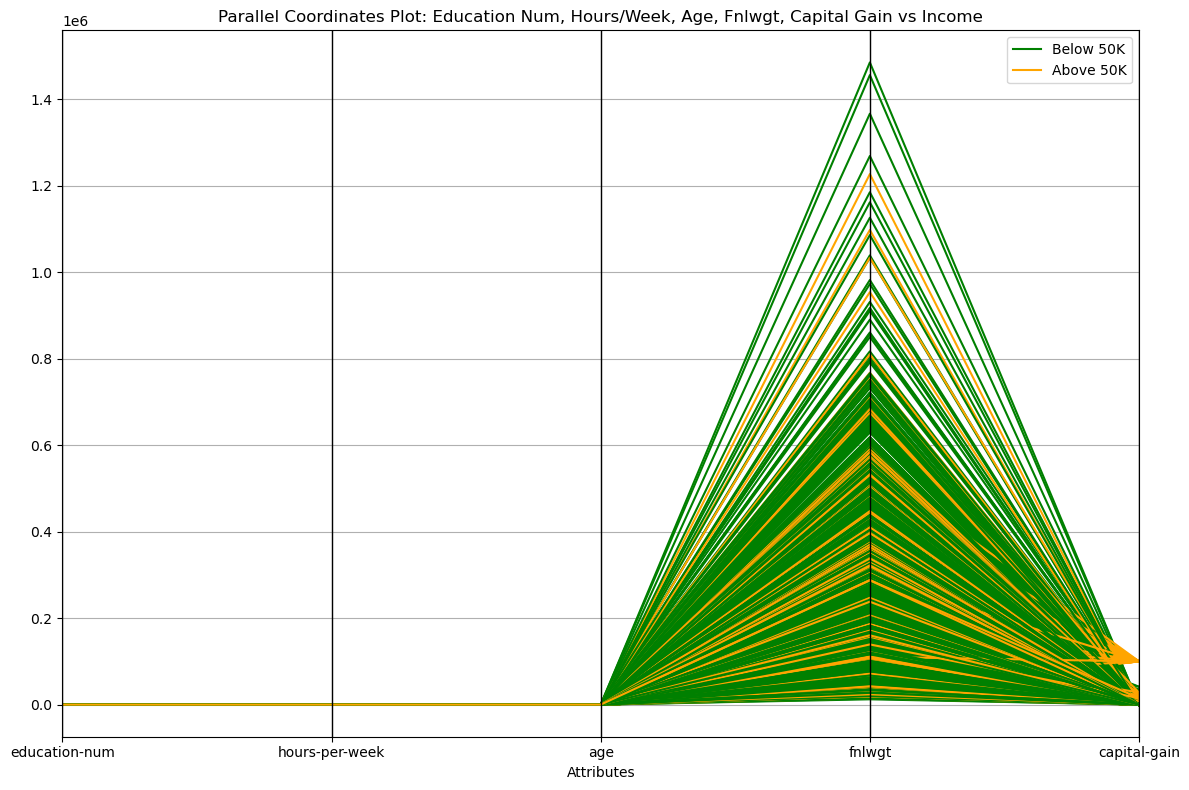

In [8]:
# --- Visualization 6: Parallel Coordinates Plot (Corrected) ---
parallel_data = data[['education-num', 'hours-per-week', 'age', 'fnlwgt', 'capital-gain', 'income']].copy()
parallel_data['income_numeric'] = parallel_data['income'].apply(lambda x: 'Above 50K' if x == '>50K' else 'Below 50K')
parallel_data.drop(columns=['income'], inplace=True)

plt.figure(figsize=(12,8))
parallel_coordinates(parallel_data, class_column='income_numeric', color=['green', 'orange'])
plt.title('Parallel Coordinates Plot: Education Num, Hours/Week, Age, Fnlwgt, Capital Gain vs Income')
plt.xlabel('Attributes')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

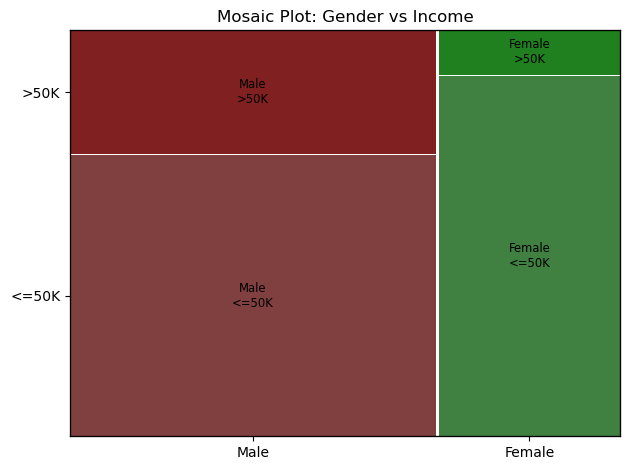

In [9]:
# --- Visualization 7: Mosaic Plot - Gender vs Income ---
plt.figure(figsize=(8,6))
mosaic(data, ['sex', 'income'])
plt.title('Mosaic Plot: Gender vs Income')
plt.tight_layout()
plt.show()

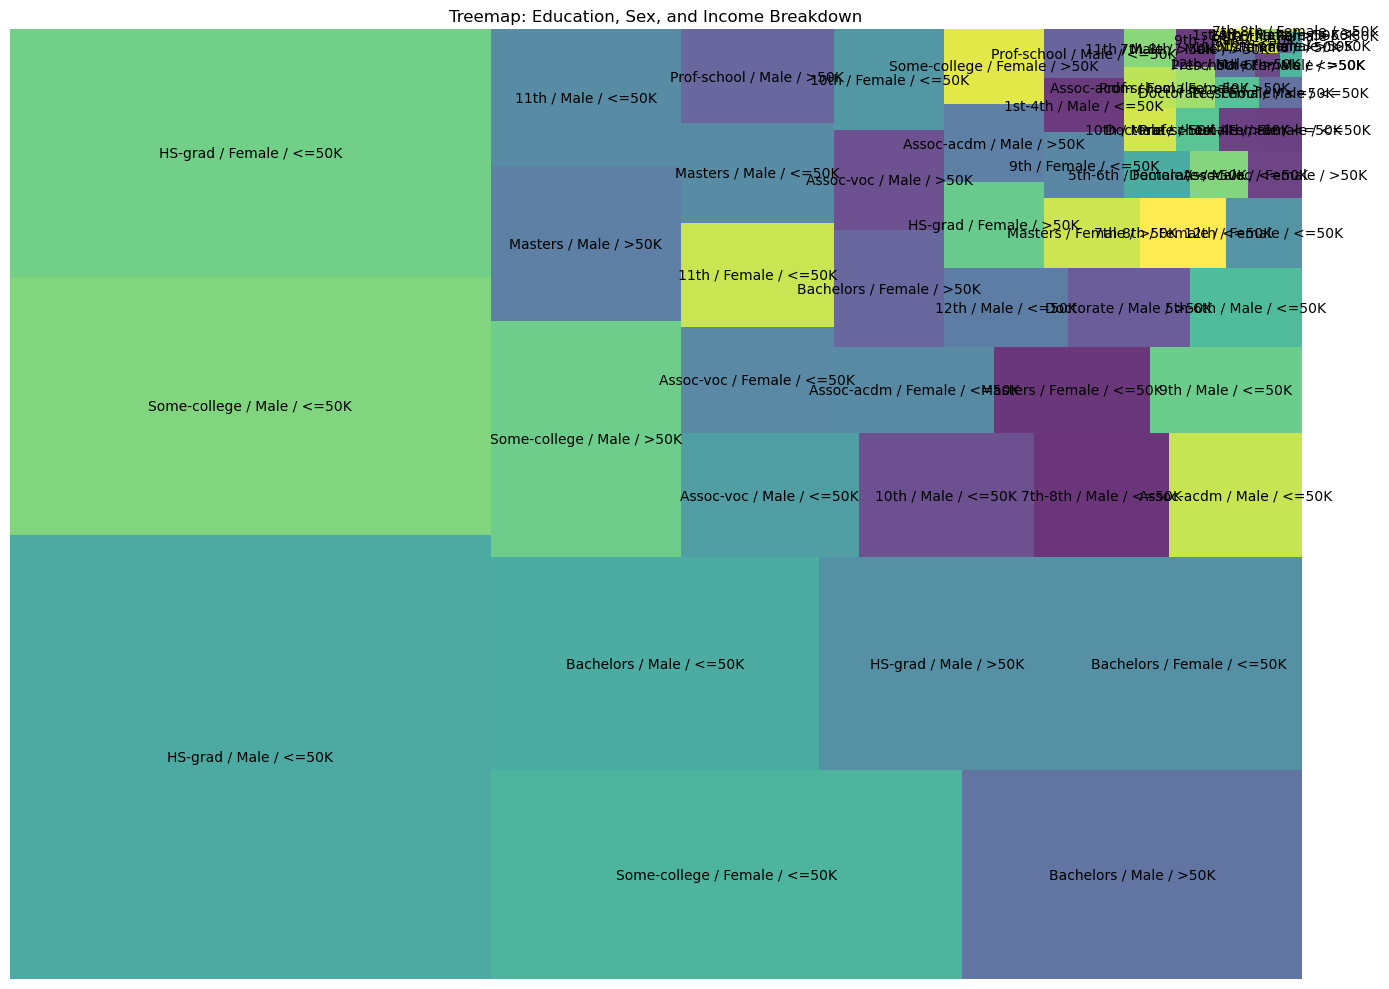

In [10]:
# --- Visualization 8: Treemap - Education vs Sex vs Income ---
data['combo'] = data['education'] + ' / ' + data['sex'] + ' / ' + data['income']
treemap_data = data['combo'].value_counts().reset_index()
treemap_data.columns = ['combo', 'count']

plt.figure(figsize=(14,10))
squarify.plot(sizes=treemap_data['count'], label=treemap_data['combo'], alpha=0.8)
plt.axis('off')
plt.title('Treemap: Education, Sex, and Income Breakdown')
plt.tight_layout()
plt.show()
